# **Anomaly Detection using Supervised Machine Learning**

## Installing PyOD

In [2]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!

     |████████████████████████████████| 102kB 5.3MB/s 
  Created wheel for pyod: filename=pyod-0.8.7-cp37-none-any.whl size=115979 sha256=65bf25f1c7079a481e5d72aba1d1a3cdce9c10a0f269f3133cd5b1f166944aa6
  Stored in directory: /root/.cache/pip/wheels/b7/8a/c9/5fe3f32692ad445fe573cf5b953d7a0d55dc1f7c8e229ebda0
Successfully built pyod
Requirement already up-to-date: pyod in /usr/local/lib/python3.7/dist-packages (0.8.7)


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.utils.data import evaluate_print

%matplotlib inline
import matplotlib.font_manager
state=42

***Extra Utilities provided by PyOD:***
A function *generate_data()* can be used to generate random data with outliers. Inliers data is generated by a multivariate Gaussian distribution and outliers are generated by a uniform distribution.
We can provide our own values of outliers fraction and the total number of samples that we want in our dataset. We will use this utility function to create data in the implementation part.

## Generating random data

Text(0, 0.5, 'F2')

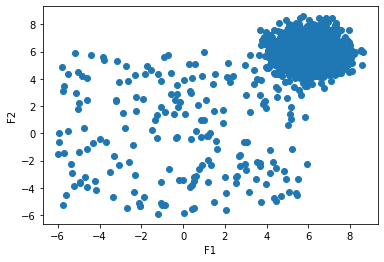

In [4]:
#generate random data with two features
X_train, Y_train = generate_data(n_train=2000,train_only=True, n_features=2, random_state=state)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

## 6 Algorithms 

In [5]:
models = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),

     'Isolation Forest': IForest(contamination=outlier_fraction,random_state=state),

     'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outlier_fraction,check_estimator=False, random_state=state),

     'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outlier_fraction),

     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction),
     
     "Support Vector Machine":OCSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,max_iter=-1)
}

## Model Implementation

No of Errors :  Angle-based Outlier Detector (ABOD) 48
No of Errors :  Isolation Forest 32
No of Errors :  Cluster-based Local Outlier Factor (CBLOF) 18
No of Errors :  Histogram-base Outlier Detection (HBOS) 45
No of Errors :  K Nearest Neighbors (KNN) 19
No of Errors :  Support Vector Machine 94


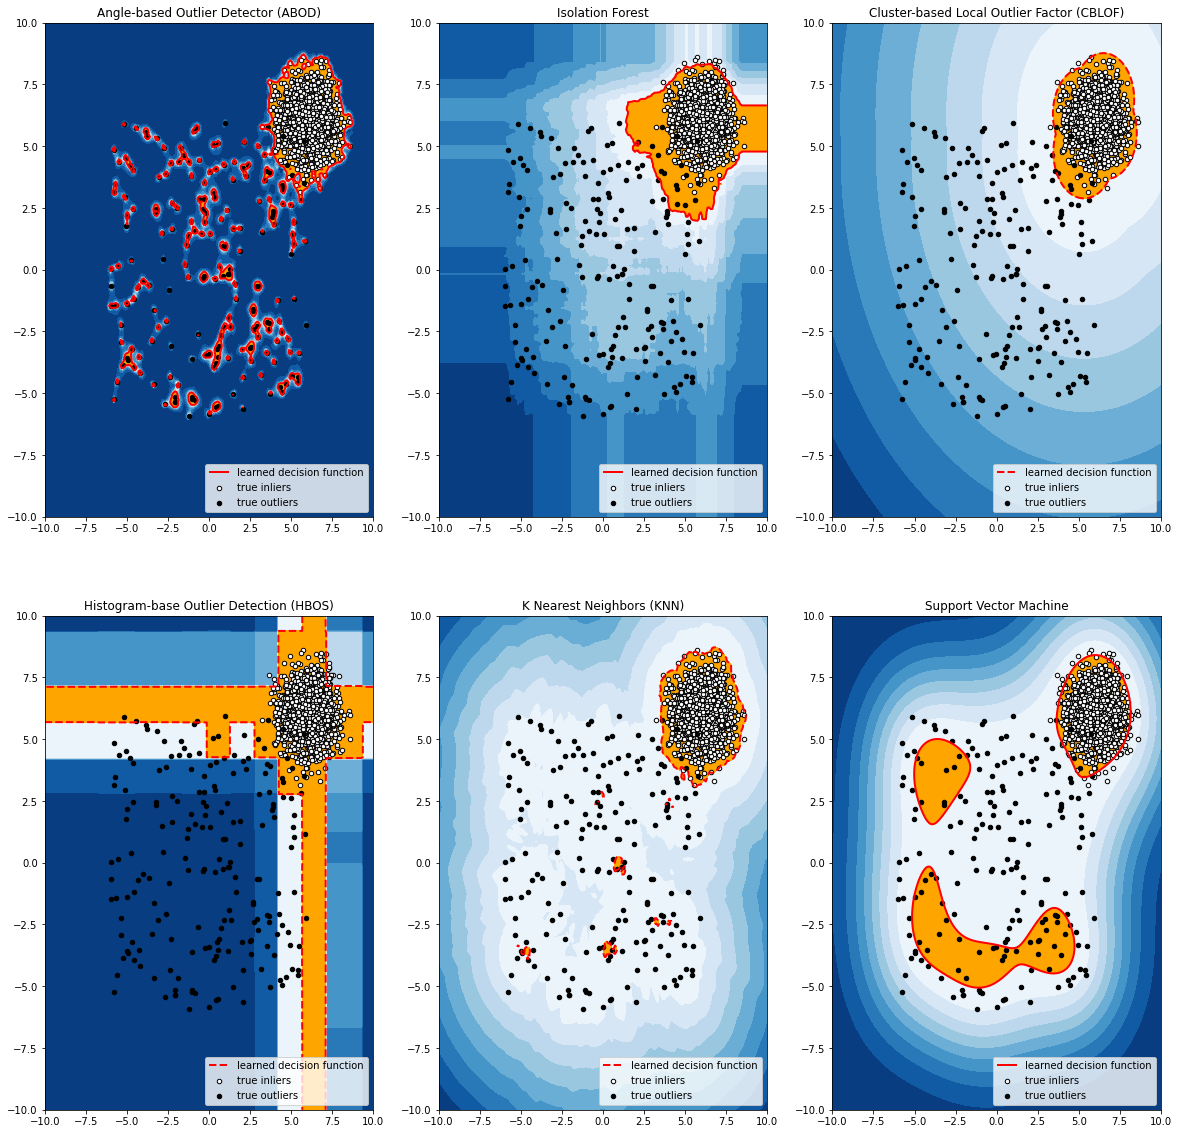

In [6]:
#set the figure size
plt.figure(figsize=(20, 20))

for i, (model_name,model) in enumerate(models.items()) :
    # fit the dataset to the model
    model.fit(X_train)

    # predict raw anomaly score
    scores_pred = model.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',model_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(2, 3, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(model_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

## Model Evaluation

In [7]:
from pyod.utils.data import evaluate_print
for i, (model_name,model) in enumerate(models.items()) :
    # fit the dataset to the model
    model.fit(X_train)

    # predict raw anomaly score
    scores_pred = model.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(X_train)
    y_train_scores = model.decision_scores_

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()

    print('No of Errors using {} : {} '.format(model_name, n_errors))
    
    evaluate_print(model_name, Y_train, y_train_scores)
    print("\n")
    

No of Errors using Angle-based Outlier Detector (ABOD) : 48 
Angle-based Outlier Detector (ABOD) ROC:0.9897, precision @ rank n:0.89


No of Errors using Isolation Forest : 32 
Isolation Forest ROC:0.9932, precision @ rank n:0.92


No of Errors using Cluster-based Local Outlier Factor (CBLOF) : 18 
Cluster-based Local Outlier Factor (CBLOF) ROC:0.995, precision @ rank n:0.955


No of Errors using Histogram-base Outlier Detection (HBOS) : 45 
Histogram-base Outlier Detection (HBOS) ROC:0.9899, precision @ rank n:0.8894


No of Errors using K Nearest Neighbors (KNN) : 19 
K Nearest Neighbors (KNN) ROC:0.9967, precision @ rank n:0.96


No of Errors using Support Vector Machine : 94 
Support Vector Machine ROC:0.9797, precision @ rank n:0.765




***All thanks to:***

@article{zhao2019pyod,
  author  = {Zhao, Yue and Nasrullah, Zain and Li, Zheng},
  title   = {PyOD: A Python Toolbox for Scalable Outlier Detection},
  journal = {Journal of Machine Learning Research},
  year    = {2019},
  volume  = {20},
  number  = {96},
  pages   = {1-7},
  url     = {http://jmlr.org/papers/v20/19-011.html}
}

for a great contribution to the PyOD library. All the work done in this notebook is inspired from [PyOD Library](https://https://pyod.readthedocs.io/en/latest/index.html).

